In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [2]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')
y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

X_train.shape

(6266, 31)

In [3]:
# Cross validate model with Kfold stratified cross val
K_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

KeyboardInterrupt: 

In [3]:
# # cols to remove from datasets
# cols_lasso = ['banner_views_old', 'days_elapsed_old', 'X3', 'marital_divorced', 'job_entrepreneur', 'job_freelance',
#              'job_housekeeper', 'job_technology', 'job_unemployed']
# # how to remove them:
# X_train = X_train.drop(columns=cols_lasso)
# X_valid = X_valid.drop(columns=cols_lasso)
# X_test  = X_test.drop(columns=cols_lasso)

(6266, 22)

In [7]:
X_train = X_train.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_valid = X_valid.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_test  = X_test.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])

In [4]:
std_num = ColumnTransformer(transformers=[('std_num', StandardScaler(), num_vars)],
                            remainder='passthrough')

In [5]:
# Define the pipeline
logistic_pipe = Pipeline([
    ('std_num', std_num),
    ('logistic_log', LogisticRegression(penalty='l2', solver='liblinear', C=1, fit_intercept=True, class_weight='balanced'))
])

In [8]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [9]:
logistic_pipe = Pipeline([
    ('std_num', std_num),
    ('logistic_log', LogisticRegression(penalty='l2', solver='liblinear', C=1, fit_intercept=True, class_weight='balanced'))
])

In [10]:
logistic_grid = np.linspace(start=0.0001, stop=0.2, num=100)
param_grid={'logistic_log__C': logistic_grid}

logCV = GridSearchCV(estimator=logistic_pipe,
                       param_grid=param_grid,
                       scoring="accuracy",
                       cv=KFold(n_splits=10, shuffle=True, random_state=42),
                       n_jobs=-2)

logCV.fit(X_train, y_train)

c:\Users\emann\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\emann\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3629, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper

ValueError: A given column is not a column of the dataframe

In [33]:
pd.DataFrame(logCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic_log__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034141,0.004140,0.009034,0.002161,0.0001,{'logistic_log__C': 0.0001},0.732057,0.735247,0.740032,0.736842,0.688995,0.757576,0.733227,0.744409,0.718850,0.698083,0.728532,0.019901,100
1,0.042694,0.006280,0.010139,0.004276,0.002119,{'logistic_log__C': 0.002119191919191919},0.816587,0.800638,0.814992,0.803828,0.802233,0.813397,0.785942,0.800319,0.792332,0.785942,0.801621,0.010617,99
2,0.048628,0.006626,0.009604,0.001452,0.004138,{'logistic_log__C': 0.004138383838383839},0.822967,0.805423,0.819777,0.810207,0.802233,0.819777,0.795527,0.809904,0.789137,0.800319,0.807527,0.010573,98
3,0.051345,0.004836,0.009388,0.002224,0.006158,{'logistic_log__C': 0.006157575757575758},0.824561,0.799043,0.827751,0.811802,0.805423,0.819777,0.797125,0.816294,0.798722,0.806709,0.810721,0.010513,97
4,0.053014,0.005248,0.010490,0.002323,0.008177,{'logistic_log__C': 0.008176767676767676},0.824561,0.802233,0.830941,0.814992,0.805423,0.822967,0.793930,0.819489,0.808307,0.806709,0.812955,0.010952,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.068892,0.004326,0.008780,0.001150,0.191923,{'logistic_log__C': 0.19192323232323233},0.814992,0.810207,0.835726,0.835726,0.813397,0.819777,0.800319,0.825879,0.824281,0.817891,0.819820,0.010505,8
96,0.074656,0.009051,0.010037,0.002240,0.193942,{'logistic_log__C': 0.19394242424242425},0.814992,0.810207,0.835726,0.835726,0.813397,0.819777,0.800319,0.825879,0.824281,0.817891,0.819820,0.010505,8
97,0.075526,0.005518,0.009677,0.001573,0.195962,{'logistic_log__C': 0.19596161616161614},0.814992,0.810207,0.835726,0.835726,0.813397,0.819777,0.800319,0.825879,0.824281,0.817891,0.819820,0.010505,8
98,0.082594,0.010138,0.010974,0.002772,0.197981,{'logistic_log__C': 0.19798080808080806},0.814992,0.810207,0.835726,0.835726,0.814992,0.819777,0.800319,0.824281,0.824281,0.817891,0.819819,0.010338,24


In [35]:
# Choose best model that minimizes cv_err
mean_scores = logCV.cv_results_["mean_test_score"]
std_scores = logCV.cv_results_["std_test_score"] / np.sqrt(logCV.n_splits_)
C_values = logCV.cv_results_["param_logistic_log__C"].data

best_index = np.argmax(mean_scores)
max_C_log = C_values[best_index]
threshold_log = mean_scores[best_index] - std_scores[best_index]
one_std_rule_C_log = np.max(C_values[mean_scores <= threshold_log])

print("Minimum C:", max_C_log)
print("1-SD C:", one_std_rule_C_log)
print("Best score for logistic:", np.max(mean_scores))

Minimum C: 0.09096363636363637
1-SD C: 0.02836868686868687
Best score for logistic: 0.8202982405185196


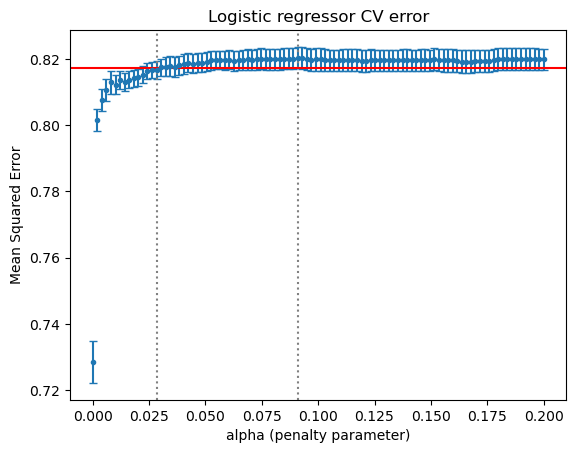

In [36]:
# plt.figure(figsize=(7,6))
plt.errorbar(x=C_values, y=mean_scores, yerr=std_scores, fmt='.', capsize=3)

plt.axvline(x=max_C_log, ls='dotted', color="grey")  # vertical line at the k yielding minimum CV MSE
plt.axvline(x=one_std_rule_C_log, ls='dotted', color="grey")   # vertical line at best k value according to 1 std err rule
plt.axhline(y=threshold_log, color="red")  # horizontal line line at best k value according to 1 std err rule

plt.title("Logistic regressor CV error")
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Mean Squared Error')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score 

# Fit pipeline to training data
logistic_pipe.fit(X_train, y_train) # Fit it to the training data 

# Predict pipeline to training data
y_train_pred = logistic_pipe.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on training:", acc)

# Predict pipeline to test data
y_test_pred = logistic_pipe.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on test:", np.round(acc, 3))

Logistic --- Accuracy on training: 0.8220555378231726
Logistic --- Accuracy on test: 0.819


In [27]:
# Define pipeline
pipe_logistic_l2 = Pipeline(
    [("scaler", StandardScaler()),
     ("logistic", LogisticRegression(random_state = 10))])

In [28]:
# Define folds
folds = KFold(n_splits = 10, shuffle = True, random_state = 919) # The data will be randomly shuffled before the cross-validation splits are created. 
# This helps to prevent bias due to any inherent order in the data.

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(pipe_logistic_l2, param_grid = {'logistic_log__C': lr_param_grid}, cv=folds,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

ValueError: Parameter grid for parameter (logistic_log__C) needs to be a list or numpy array, but got (<class 'dict'>). Single values need to be wrapped in a list with one element.

In [ ]:
from sklearn.metrics import accuracy_score 

# Fit pipeline to training data
pipe_logistic.fit(X_train, y_train) # Fit it to the training data 

# Predict pipeline to training data
y_train_pred = pipe_logistic.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on training:", acc)

# Predict pipeline to test data
y_test_pred = pipe_logistic.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on test:", np.round(acc, 3))

Logistic --- Accuracy on training: 0.8003511011809767
Logistic --- Accuracy on test: 0.804


c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pd.DataFrame(gsLRM.cv_results_).head() # Contains results from CV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_intercept_scaling,param_max_iter,param_penalty,param_solver,param_tol,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025336,0.003689,0.002525,0.000479,0.01,1,100,l2,liblinear,0.0001,...,0.776715,0.783094,0.819777,0.784345,0.805112,0.805112,0.785942,0.792533,0.013091,172
1,0.024107,0.001540,0.002350,0.000634,0.01,1,100,l2,liblinear,0.0002,...,0.776715,0.783094,0.819777,0.784345,0.805112,0.805112,0.785942,0.792533,0.013091,172
2,0.026932,0.003920,0.002705,0.000779,0.01,1,100,l2,liblinear,0.0003,...,0.776715,0.783094,0.819777,0.784345,0.805112,0.805112,0.785942,0.792533,0.013091,172
3,0.023854,0.002211,0.003414,0.001337,0.01,1,200,l2,liblinear,0.0001,...,0.776715,0.783094,0.819777,0.784345,0.805112,0.805112,0.785942,0.792533,0.013091,172
4,0.022206,0.002276,0.002205,0.000747,0.01,1,200,l2,liblinear,0.0002,...,0.776715,0.783094,0.819777,0.784345,0.805112,0.805112,0.785942,0.792533,0.013091,172


In [ ]:
# Choose best model that minimizes cv_err
mean_scores = gsLRM.cv_results_["mean_test_score"]
std_scores = gsLRM.cv_results_["std_test_score"] / np.sqrt(gsLRM.n_splits_)
C_values = gsLRM.cv_results_["param_C"].data

best_index = np.argmax(mean_scores)
max_C_lasso = C_values[best_index]
threshold_lasso = mean_scores[best_index] - std_scores[best_index]
one_std_rule_C_lasso = np.max(C_values[mean_scores <= threshold_lasso])

print("Minimum C:", max_C_lasso)
print("1-SD C:", one_std_rule_C_lasso)
print("Best score for lasso:", np.max(mean_scores))

Minimum C: 10
1-SD C: 0.1
Best score for lasso: 0.8003503166862844


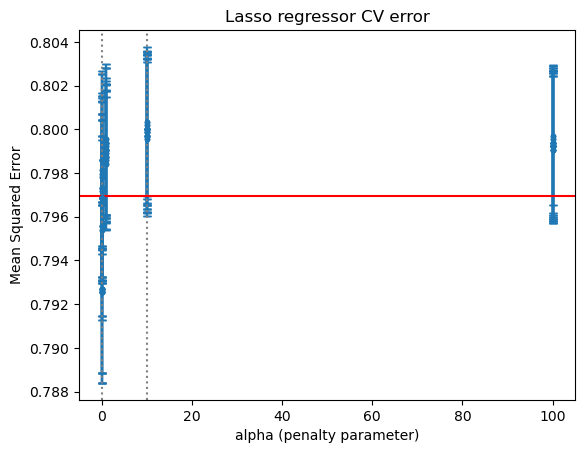

In [ ]:
# plt.figure(figsize=(7,6))
plt.errorbar(x=C_values, y=mean_scores, yerr=std_scores, fmt='.', capsize=3)

plt.axvline(x=max_C_lasso, ls='dotted', color="grey")  # vertical line at the k yielding minimum CV MSE
plt.axvline(x=one_std_rule_C_lasso, ls='dotted', color="grey")   # vertical line at best k value according to 1 std err rule
plt.axhline(y=threshold_lasso, color="red")  # horizontal line line at best k value according to 1 std err rule

plt.title("Lasso regressor CV error")
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform'),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "LogisticRegr" : LogisticRegression()
}

In [ ]:
# Start timing the models above
from time import time
nfast = 14      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.507 | time = 0.002s/0.022s
KNN(3)         | score = 0.768 | time = 0.008s/0.171s


c:\Users\emann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\emann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

RBF SVM        | score = 0.590 | time = 4.022s/1.243s
Decision Tree  | score = 0.828 | time = 0.024s/0.002s
Random Forest  | score = 0.824 | time = 0.045s/0.003s


C:\Users\emann\AppData\Local\Temp\ipykernel_24688\1218349790.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
c:\Users\emann\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Net     | score = 0.815 | time = 3.333s/0.002s


c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost       | score = 0.807 | time = 0.316s/0.016s
Naive Bayes    | score = 0.732 | time = 0.005s/0.003s
QDA            | score = 0.722 | time = 0.050s/0.003s


c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\emann\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\emann\anaconda3\lib\site-packages\s

Linear SVC     | score = 0.792 | time = 0.301s/0.002s
Linear SVM     | score = 0.800 | time = 10.015s/0.102s


c:\Users\emann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 